In [1]:
from csv_analysis import BayesDB_Simulator, pred_wrapper, add_bouts_reversed_label, make_regression_plots
%matplotlib inline
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.stats import norm, beta, gamma, erlang, alpha, exponnorm
import warnings
warnings.filterwarnings('ignore')
sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})



In [2]:
fish_id = "wik_bdb"
file_id = "bdb_hunts_inverted.bdb"
file_id_raw = "bdb_hunts.bdb"
bdsim = BayesDB_Simulator(fish_id, file_id, -1)
data = pd.read_csv('wik_bdb/huntbouts_inverted.csv')
data_raw = pd.read_csv('wik_bdb/all_huntbouts_rev.csv')
bdsim_raw = BayesDB_Simulator(fish_id, file_id_raw, -1)



### USE FOR AZ QUERIES

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
125 bouts in Query 1
Mean Q1 = 0.54363452952
51 bouts in Query 2
Mean Q2 = 0.0807020977255
Ttest_indResult(statistic=5.0778249198492764, pvalue=9.7561899959149541e-07)


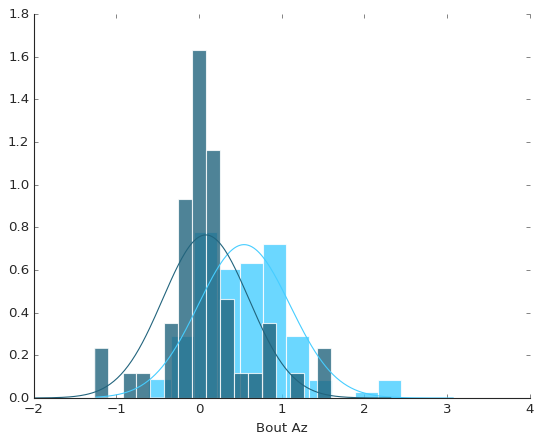

SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
SELECT "Bout Az" FROM bout_table WHERE "Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
235 bouts in Query 1
Mean Q1 = 0.452069096515
97 bouts in Query 2
Mean Q2 = 0.187377554464
Ttest_indResult(statistic=3.4138692564935762, pvalue=0.00072029484495911777)


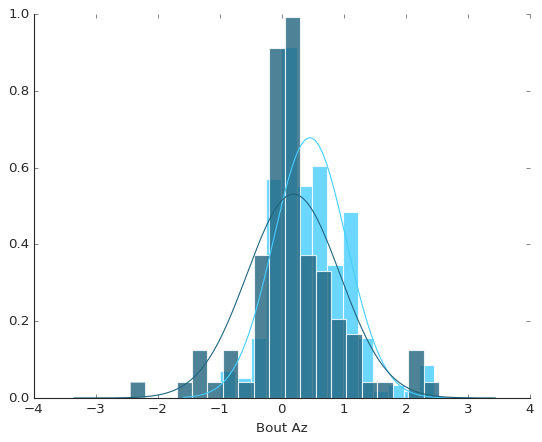

In [3]:
color = husl[5]
raw_q = bdsim_raw.compare_2_queries('"Bout Az"', 
    '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    1, 0, color)
inv_q = bdsim.compare_2_queries('"Bout Az"', 
    '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    '"Para Az" BETWEEN .3 AND .6 AND "Para Az Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    1, 0, color)
pl.savefig('Az_2q.pdf')

### USE FOR ALT QUERIES

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
278 bouts in Query 1
Mean Q1 = 0.218354768245
366 bouts in Query 2
Mean Q2 = 0.0154939452077
Ttest_indResult(statistic=5.8122774880591601, pvalue=9.7112438046864712e-09)


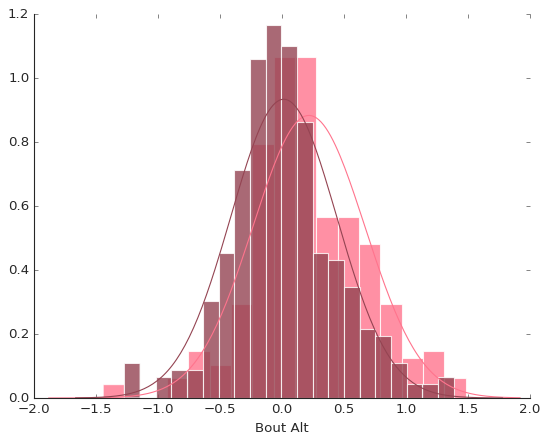

SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
SELECT "Bout Alt" FROM bout_table WHERE "Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3
306 bouts in Query 1
Mean Q1 = 0.252225709565
376 bouts in Query 2
Mean Q2 = 0.0380608759761
Ttest_indResult(statistic=6.1971808419256904, pvalue=9.961710700735865e-10)


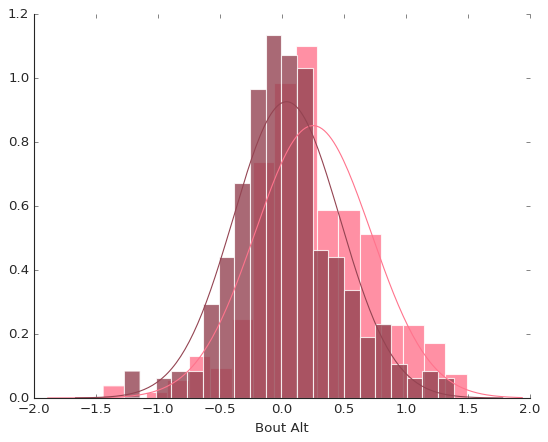

In [4]:
color = husl[0]
raw_q = bdsim_raw.compare_2_queries('"Bout Alt"', 
    '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    1, 0, color)
inv_q = bdsim.compare_2_queries('"Bout Alt"', 
    '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    '"Para Alt" BETWEEN .3 AND .6 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" == 3', 
    1, 0, color)
pl.savefig('Alt_2q.pdf')

### USE FOR DESCRIBING PARA POSITION CONTROLS

SELECT "Para Alt" FROM bout_table WHERE "Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
SELECT "Para Alt" FROM bout_table WHERE "Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
14 bouts in Query 1
Mean Q1 = 0.881981938286
18 bouts in Query 2
Mean Q2 = 0.8835747995
Ttest_indResult(statistic=-0.0635960990798317, pvalue=0.94971370050954773)


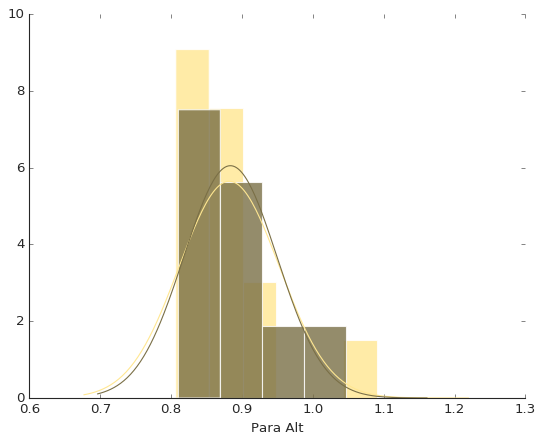

In [5]:
color = cp[8]
two_p = bdsim_raw.compare_2_queries('"Para Alt"', 
    '"Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', 
    '"Para Alt" BETWEEN .8 AND 1.5 AND "Para Alt Velocity" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3',
    1, 0, color)

### OVERLAPPING TWO VARIABLE REGRESSIONS

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Bout Number" == 0 AND "Strike Or Abort" < 3
384 Bouts
Unexplained Variance  0.0339123282677


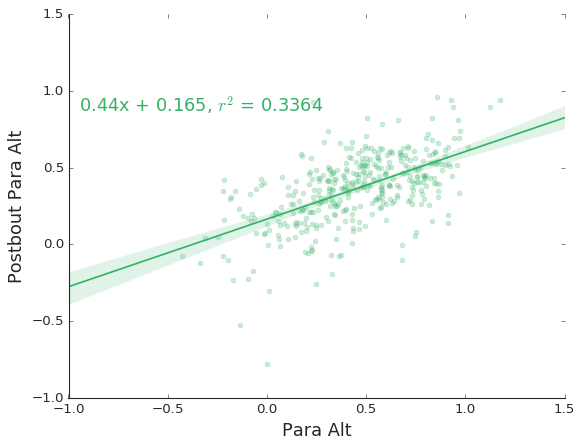

In [8]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0 AND "Para Alt Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .3 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2')
#rp = bdsim.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 AND .3 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" < 0')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" < 0) OR ("Para Az" < 0 AND "Para Az Velocity" > 0))', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Az" > 0 AND "Para Az Velocity" > 0) OR ("Para Az" < 0 AND "Para Az Velocity" < 0))', husl[3], labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az" > 0 AND "Para Az Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az" < 0 AND "Para Az Velocity" < 0')
#rp = bdsim.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" > 0')
#rp2 = bdsim.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Az Velocity" < 0')
rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3', husl[3], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3', husl[3], labels)
rp[0].savefig('regplot.pdf')
#rp2[0].savefig('regplot2.pdf')
pl.show()
#mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, [husl[3], husl[0]])
#mrp.savefig('mrp_az.pdf')

In [21]:
labels = ("Para Alt", "Postbout Para Alt")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
colors = [husl[0], husl[1]]
#rp = bdsim.two_variable_regression(query_exp, '"Para Alt" BETWEEN 0 and .3 AND "Bout Number" >= 0 AND "Strike Or Abort" <= 2')
#rp = bdsim.two_variable_regression(query_exp, '"Para Alt" BETWEEN 0 AND .3 AND "Bout Number" >= 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" < 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" > 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" == 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" > 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" < 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" > 0))')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND (("Para Alt" > 0 AND "Para Alt Velocity" > 0) OR ("Para Alt" < 0 AND "Para Alt Velocity" < 0))')
#rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" > 0 AND "Para Alt Velocity" > 0')
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt" < 0 AND "Para Alt Velocity" < 0')
rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3', colors[0], labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" > 0', colors[0], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0', colors[1], labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" > 0', colors[0], labels)
#rp2 = bdsim_raw.two_variable_regression(query_exp, '"Para Alt" < 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3 AND "Para Alt Velocity" < 0', colors[1], labels)
rp[0].savefig('regplot.pdf')
rp2[0].savefig('regplot2.pdf')
mrp = make_regression_plots(rp[1],rp[2], rp2[1], rp2[2], labels, colors)
mrp.savefig('mrp.pdf')

SELECT "Para Alt","Postbout Para Alt" FROM bout_table WHERE "Para Alt" > 0 AND "Bout Number" > 0 AND "Strike Or Abort" < 3
1562 Bouts
Unexplained Variance  0.028794031166


NameError: name 'rp2' is not defined

### REGRESSION FOR RAW DATA

SELECT "Para Az","Bout Delta Yaw" FROM bout_table WHERE "Bout Number" > 0 AND "Strike Or Abort" <= 2
1784 Bouts
Unexplained Variance  0.0154794162778


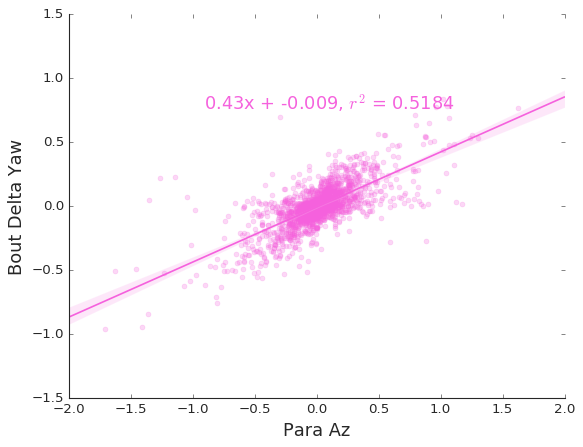

In [63]:
labels = ("Para Az", "Bout Delta Yaw")
query_exp = '"' + labels[0] + '","' + labels[1] + '"' 
color = husl[7]
#rp = bdsim_raw.two_variable_regression(query_exp, '"Para Az" BETWEEN 0 and .1')
rp = bdsim_raw.two_variable_regression(query_exp, '"Bout Number" > 0 AND "Strike Or Abort" <= 2', color, labels)
#rp = bdsim_raw.two_variable_regression(query_exp, '')
rp[0].savefig('regplot.pdf')
pl.show()

### SINGLE VARIABLE HISTOGRAMS

SELECT "Para Alt" FROM bout_table WHERE "Bout Number" <= -1  AND "Strike Or Abort" <= 1 AND "Para Dist" < 100
140 total bouts
0.3042031745
0.196529118695
SELECT "Para Alt" FROM bout_table WHERE "Bout Number" <= -1  AND "Strike Or Abort" <= 1 AND "Para Dist" > 100
22 total bouts
0.302822869091
0.193768432382
(0.029621776482870499, 0.3, 0.1963317052314183)
(0.30420317449999995, 0.19652911869474318)


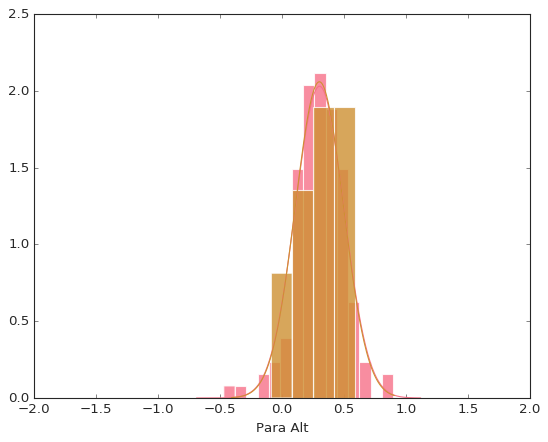

In [61]:
#p1, d1 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" <= -1  AND "Strike Or Abort" == 2', husl[0])
p2, d2 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" <= -1  AND "Strike Or Abort" <= 1 AND "Para Dist" < 100', husl[0])
p3, d3 = bdsim_raw.single_hist('"Para Alt"', '"Bout Number" <= -1  AND "Strike Or Abort" <= 1 AND "Para Dist" > 100', husl[1])
#fit = beta.fit(d2, floc=0)
#fit = beta.fit(d2, floc=0)
fit = exponnorm.fit(d2, floc=.3)
print fit
#pl.plot(np.linspace(-2,2,100), [beta.pdf(x, fit[0], fit[1], scale=fit[3]) for x in np.linspace(-2,2,100)])
#pl.plot(np.linspace(-2,2,100), [exponnorm.pdf(x, fit[0], fit[1], scale=fit[2]) for x in np.linspace(-2,2,100)])
normfit = norm.fit(d2)
print normfit
pl.show()

In [50]:
print normfit
print norm.cdf(.5, .30, .19)

(0.30401572561728391, 0.19615706057480004)
0.853745060908


### PREDICTION CALCULATORS

In [116]:
# ALWAYS USE INVERTED DATA HERE!
spacing = .3
p_angle_bounds = [[i, i+spacing] for i in np.arange(0,1,spacing)]
norm_az = 0
norm_alt = 0
p_angle_bounds_invert = [[-a[1], -a[0]] for a in p_angle_bounds]
print p_angle_bounds_invert
vels = [-5, -.01]
vels = [.01, 5]
use_abs_val = 0
distance_limit = [0, 1000]
#p_angle_bounds = [[0, 1]]
#distance_limit = [0, 200]
actions = [1,2]
#skip_bout_numbers = ['reverse', range(-50, -3) + [-1]]
#skip_bout_numbers = ['forward', range(1, 50) + [-1]]
skip_bout_numbers = ['forward', [-1,0]]

[[-0.29999999999999999, -0.0], [-0.59999999999999998, -0.29999999999999999], [-0.89999999999999991, -0.59999999999999998], [-1.2, -0.89999999999999991]]


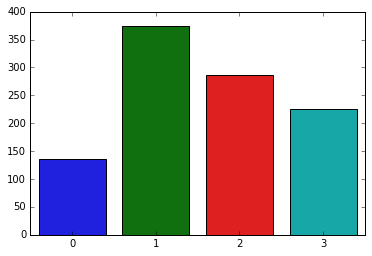

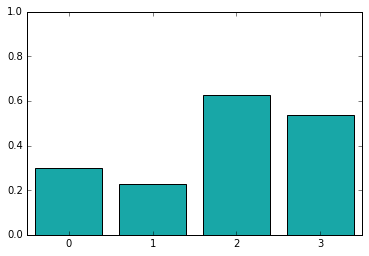

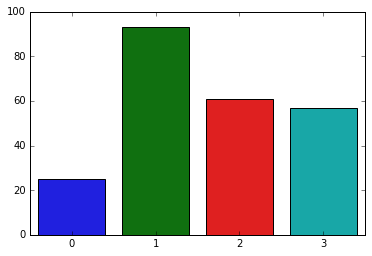

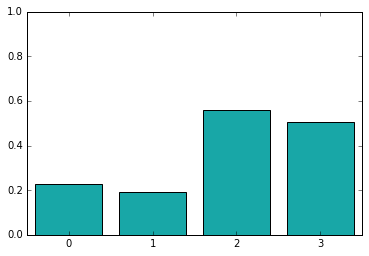

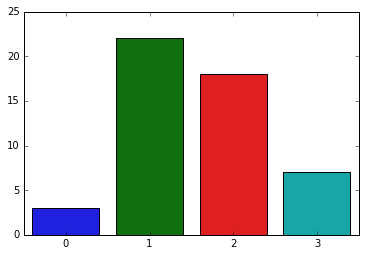

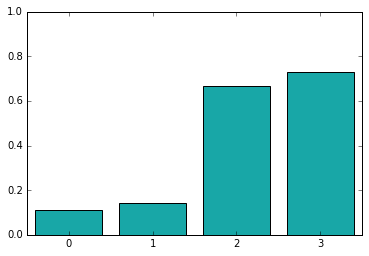

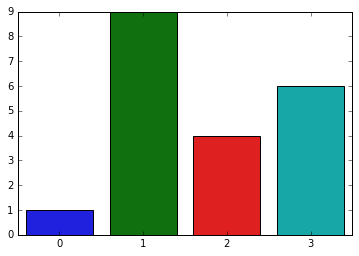

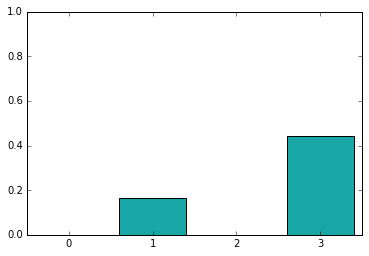

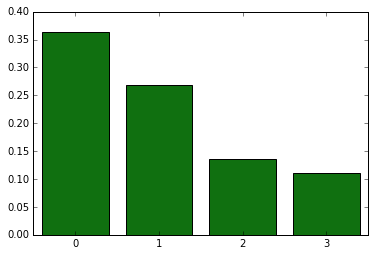

TOTAL BOUTS
[511, 118, 25, 10]


In [117]:
tb, bout_assignment = pred_wrapper(data, p_angle_bounds, 
                                   skip_bout_numbers, actions, distance_limit, use_abs_val, vels, 
                                   norm_az, norm_alt, 'az')

IndexError: list index out of range

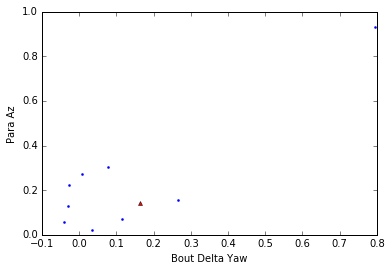

In [118]:
varb = "Bout Delta Yaw"
varb_predict_overshoot = []
varb_predict_undershoot = []

p_angle_bounds = p_angle_bounds[0]
plot_varb1 = "Bout Delta Yaw"
plot_varb2 = "Para Az"

# a bout assignment of 1 is an undershooting lag.
# bout assignment of 2 is an overshooting lag
# bout assignment of 3 is an undershooting lead.
# bout assignment of 4 is an overshooting lead

# dots are lags, triangles are leads
# blue is undershoot, red is overshoot

for ind, p_az in enumerate(data["Para Az"]):
        marker_size = 4
        if bout_assignment[ind] == 0:
            continue
        if bout_assignment[ind] == 1:
            marker_type = '.'
            p_color = 'b'
        if bout_assignment[ind] == 2:
            marker_type = '.'
            p_color = 'r'
        if bout_assignment[ind] == 3:
            marker_type = '^'
            p_color = 'b'
            varb_predict_undershoot.append(data[varb][ind])
        if bout_assignment[ind] == 4:
            marker_type = '^'
            p_color = 'r'
            varb_predict_overshoot.append(data[varb][ind])
        pl.plot(data[plot_varb1][ind], data[plot_varb2][ind], color=p_color,
            marker=marker_type, ms=marker_size, linestyle='None')
        pl.xlabel(plot_varb1)
        pl.ylabel(plot_varb2)
pl.savefig('circle_triangle_plot.pdf')
pl.figure()
sb.distplot(varb_predict_overshoot, fit_kws={"color":"blue"}, fit=norm, kde=False,color='b')
sb.distplot(varb_predict_undershoot, fit_kws={"color":"yellow"}, fit=norm, kde=False,color='y')


pl.savefig('prediction_tally.pdf')

# RED CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING RIGHT
# BLUE CIRCLES ARE A FAIL TO LEAD WHEN PARA IS GOING LEFT
# RED SQUARES ARE A SUCCESSFUL LEAD WHEN PARA IS GOING RIGHT
# BLUE TRIANGLES ARE SUCCESSFUL LEADS WHEN PARA IS GOING LEFT
# RED CIRCLES ACCOUNT FOR NOT SEEING A CHANGE IN BOUT AZ AND YAW IN THIS WINDOW! 

In [ ]:
pred_velocities = []
for loc, i in enumerate(bout_assignment):
    if i != 0:
        pred_velocities.append(data["Para Az Velocity"][loc])
pl.hist(3*np.degrees(pred_velocities), bins=20)

        
        

#         print('Pred Bout Assignment: ' + str(bout_assignment[loc]))
#         a = raw_input('')

In [ ]:
print np.degrees(np.mean(np.abs(data["Para Az Velocity"])))
#print np.degrees(np.mean(np.abs(nac_data["Para Az Velocity"])))

(6698,)
(6698,)


[-3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -4,
 -3,
 -2,
 -1,
 -4,
 -3,
 -2,
 -1,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 1.0,
 1.0,
 1.0,
 1.0,
 -2,
 -1,